<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

#  Quantum computing - Basics

## Modules – Modern
<section class="post-meta">
By Niels Henrik Aase, Thorvald Ballestad, Jenny Lunde, Sondre Duna Lundemo
</section>
Last edited: September 20th 2020


___
This notebook will explain the simplest aspects of quantum computation, and show how quantum circuits can be implemented. The implementation will be done on both classical and quantum computers, using the [qiskit](https://qiskit.org/) framework provided by IBM. Some physics jargon will be used, but the main bulk of work should be accessible for students from other majors than physics, especially those with a background from mathematics or computer science. The most important prerequisite is linear algebra.
___

## Introduction

For physics students today, quantum computers is perhaps one of the most exciting practical uses of quantum mechanics. As the quantum industry grows every year, the job market for "applied" quantum mechanics is more favorable to physics students now than it has ever been. Working with quantum computers is an enormous interdisciplinary project, which requires engineers, mathematicians and physicists alike. However, physicists have the advantage of already having a deep understanding of the quantum phenomena such as superposition and entanglement, quantum properties that are essential to work with quantum computers. 


In order to harness the enormous potential power of the quantum computers, we need to develop special algorithms, algorithms that are radically different from classical algorithms. [This](https://www.youtube.com/watch?v=lvTqbM5Dq4Q) brilliant, albeit long, video introduces such an algorithm, Shor's algorithm, while using layman terms. On a perfectly working quantum computer with a sufficient number of qubits, this algorithm will be able to factorize much larger numbers than a classical computer. This may not sound that impressive, but considering that a significant portion of digital encryption is based on the fact that it is nearly impossible to factorize large numbers, you can clearly see the world-changing potential of quantum computers. With a quantum computer you could in theory decrypt every message and file, which is clearly an extremely powerful tool. Fortunately, the technology required to run such this specific algorithm is not ready yet (Using only Schor's algorithm on a real quantum computer, the largest number scientists have been able to factorize is 21), so your files are still safe! This is only one of the examples of quantum algorithms that may radically change our society. Quantum computers can also be used to solve problems in chemistry, optimization, and more! However, it must be noted that the quantum computers most likely only will outperform classical computers in highly specialized tasks, such as big number factorization, and that your not likely to carry a quantum computer in your back pocket in the near future. 

Let us start with explaining the basics of a qubit, the central part of quantum computers.


### Qubits

An ordinary bit is either a 1 or a 0. Physically this can be represented through a voltage pulse. However for a qubit, things are a quite different. The general state of the qubit is denoted by $\vert\psi\rangle$ and consists of two levels, $\vert0\rangle$ and $\vert1\rangle$. The most general expression for $\vert\psi\rangle$ is then given by

$$
\vert\psi\rangle = c_0 \vert0\rangle + c_1 \vert1\rangle.
\label{Single_qubit}
$$
Here, we have used the conventional [ket-noation](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation). If you are unfamiliar with the notation, don't despair! A ket vector is simply a column vector expressed in a given basis. We can thus express $\vert\psi\rangle$ as a column vector (using $\vert0\rangle$ and $\vert1\rangle$ as our basis)

$$
\vert\psi\rangle = \begin{bmatrix} c_0 \\
c_1 
\end{bmatrix}.
\label{Single_qubit_col}
$$
Going forward, we will keep to the ket-notation. The constants $c_0$ and $c_1$ fulfill the normalization property of quantum mechanics, i.e. that we can consider the squared value of $\psi$ as a probability distribution. In our case the distribution is discrete, and we have 

$$
|c_0|^2 + |c_1|^2 = 1, c_0, c_1 \in \mathbb{C}.
\label{Norm_single_qubit}
$$

Now we can clearly see the difference between a bit and a qubit. If a bit is a 1, it will stay a 1 until we change it. With qubits we can replicate this by choosing $|c_1|^2 = 1$ and $|c_0|^2 = 0$, such that $\vert\psi\rangle =\vert1\rangle$. However, if we choose $|c_0|^2=|c_1|^2 = \frac{1}{\sqrt{2}}$, still fulfilling equation \eqref{Norm_single_qubit}, we get $\vert\psi\rangle = \frac{1}{\sqrt{2}}\vert0\rangle + \frac{1}{\sqrt{2}} \vert1\rangle $ , indicating that our qubit is _both_ $0$ and $1$ _at the same time_ ! This is one of the fundamental properties of quantum mechanics and is called superposition. Until we measure which state the qubit is in, it is in both states simultaneously, but when measured we will always get either $0$ or $1$, where the probability of measuring each state is given by $|c_0|^2$ and $|c_1|^2$ [[1]](#rsc). This is called collapsing the wave function. It may seem strange to use such a nondeterministic process in a computer, but the nondeterminacy is exactly what makes the quantum computers so powerful!

Applying the same formalism as previously on a two qubit-system we get

$$
\vert\psi_2\rangle = c_{00} \vert00\rangle + c_{01} \vert01\rangle + c_{10} \vert10\rangle + c_{11} \vert11\rangle \\
|c_{00}|^2 + |c_{01}|^2 + |c_{10}|^2 + |c_{11}|^2 = 1, c_{00}, c_{01}, c_{10}, c_{11} \in \mathbb{C},
\label{Double_qubit}
$$
where these new states such as $\vert00\rangle$ indicate that both qubits is equal to zero. This can be further generalized to $n$ qubits, the most important takeaway in this generalization is that the number of possible states of the system scales as $2^n$. This statement is equivalent to saying that the dimension of the state space is $2^n$.

For reaching a sufficient number of qubits, we need to build an actual quantum computer. Companies such as IBM and Google, as of 2019, have working quantum computers with about 50 qubits. The biggest problems for their computers are that they are not scalable, and quantum _decoherence_. Quantum decoherence is the loss of coherence, basically the qubits are unstable, they interact with other parts of the system, and change it's states. Thus, the number of qubits are not the only thing the matters, the quality of the qubits (i.e. their ability to withstand decoherence) is also an important factor. Recently, the metric *Quantum volume* has been used to encapsulate these factors, in addition to other features, such that the quality of a quantum computer is represented through a single number. 




## Single qubit gates

A qubit is a two-level system (TLS), meaning that it consists of two independent states. This can be realized in various ways, one famous example is the spin of the electron. The spin is either "up" corresponding to the state $\vert 0\rangle$ or down with state $\vert 1\rangle$. Let us assume that we can prepare the electron so that it starts with spin down, $\vert \psi_0\rangle = \vert 0\rangle$. Applying an oscillating electromagnetic field $E(t)$ it is possible to change $\vert \psi_0\rangle$ such that depending on how long the field is applied, $\vert \psi_0\rangle$ is transformed according to 


$$
\vert \psi(t)\rangle=  
\begin{bmatrix}
\cos(t\Omega/2) & -\sin(t\Omega/2)\mathrm{e}^{-i\phi} \\
\sin(t\Omega/2)\mathrm{e}^{i\phi} & \cos(t\Omega/2)
\end{bmatrix}
 \vert \psi_0\rangle,
\label{simple_U}
$$

where $\Omega$ is called the Rabi frequency, and can be expressed through the strength of the electromagnetic field, the strength of interaction between the field and the spin and a few other parameters. A thorough derivation of this expression can be found in chapter 3 in [[2]](#rsc). Note that to find $\vert \psi(t)\rangle$, we simply multiply the matrix with the column vector, using normal matrix multiplication. You also might notice the similarity to the 2D rotation matrix, and this is a fundamental property of matrices that can be applied to qubits. They **always** preserve the norm of our state. An equivalent statement is that the sum of all possible outcomes (states) is always 1.

In the previous paragraph we tried to motivate how it is physically possible to manipulate qubits by applying an electromagnetic field in the presence of an electron. Changing the state of the qubit (in this case spin of the electron) is often referred to as applying a gate. Exactly how to apply gates depend on what kind of qubits (spin, polarization of light etc.) that are being used. The most general expression for a _single_ qubit gate, regardless of the physical nature of the qubits, is given by the matrix $\mathrm{U3}(\theta, \phi, \lambda)$ on the form

$$
\mathrm{U3}(\theta, \phi, \lambda) =  
\begin{bmatrix}
\cos(\theta/2) & -\sin(\theta/2)\mathrm{e}^{i\lambda} \\
\sin(\theta/2)\mathrm{e}^{i\phi} & \cos(\theta/2)\mathrm{e}^{i(\phi + \lambda)}
\end{bmatrix},
\label{U3}
$$

The three angles in $\mathrm{U3}(\theta, \phi, \lambda)$ are enough to generate any single-qubit superposition state, regardless of the input state. Observe that at $t=\frac{\theta}{\Omega}$, and for the $\lambda = -\phi$, the matrices in equations \eqref{simple_U} and \eqref{U3} are identical.  

We have thus covered the first essential quantum phenomenon _superposition_. For the more interested reader, the book by Nielsen and Chuang [[3]](#rsc) is the most common starting place for students that wish to get a deep understanding of quantum computing.

We will now list a few of the most common single qubit gates. Note that all of them can be written for a specific (non-unique) combination of $\theta, \phi, \lambda$. We list with the Pauli gates, $X, Y$ and $Z$, as well as the Hadamard gate $H$

$$
X= \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix},  \;
Y = \begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}, \;
Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}, \;
H = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}. 
$$


## Schrödinger's cat

Before we introduce many-qubits systems, let us us explore how we can use the IBM framework qiskit, to create our own quantum circuits.

We will start with a simple example, namely by creating a Cat state (named after the Schrödinger's cat thought experiment). Observe that if we have an initial state $\vert\psi_i\rangle = \vert0\rangle$, applying a Hadamard gate will yield the output state


$$
\vert\psi_0\rangle=  H \vert\psi_i\rangle = \frac{1}{\sqrt{2}}\vert 0\rangle + \frac{1}{\sqrt{2}} \vert 1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}, 
$$

by standard matrix multiplication.

Let us create the circuit in qiskit. To avoid any confusion, we will import the qiskit functions as we need them. The only non-standard library required to run the notebook is [qiskit](https://qiskit.org/documentation/install.html), but we also use MiKTeX in order to have LaTeX font in our figures. The latter is simply a cosmetic choice, and can be avoided if you do not have the font available. 

In [1]:
import matplotlib.pyplot as plt

newparams = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

# Remember to install qiskit before starting
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Remove the following lines if you do not have LaTeX font available.
from matplotlib import rc
font = {'size' : 16}
rc('font', **font);
rc('text', usetex=True)


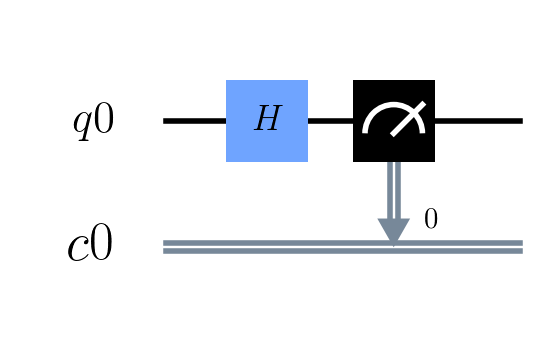

In [2]:
qr = QuantumRegister(1)  # Creates one qubit. Unless otherwise specified, they are initialized to |0>
cr = ClassicalRegister(1)  # To measure a qubit, we need to couple the qubit to a classical register
qc = QuantumCircuit(qr, cr)  # Combines the registers in order to create a quantum circuit
qc.h(0)  # Applies a Hadamard gate on the first (and only) qubit. The qubits are zero-indexed
qc.measure(qr, cr)  # Performs a measurement of the qubit, thus changing the state to either zero or one. 

# See the circuit:
qc.draw(output='mpl')


After we have created the Cat state, we measure the qubit. From previously we know that there will be a 50/50 probability to measure 0 or 1. Now we will simulate this circuit on a classical computer. You might wonder how a classical computer can simulate a quantum computer. Remember that the dimension of the state space scales as $2^n$, which means that we can use a classical bit to determine each of the possible states. Due to the exponential scaling, your own PC will probably only be able to process quantum simulations of up around $n \approx 20$ qubits.

To simulate, we can take our quantum circuit, and represent each gate as a $2^n \times 2^n$ matrix, and simply multiply the matrices in order to find the exact output state. If the output state is in superposition, a random number generator is used in order to "measure" the qubit(s). Thus it is computationally trivial to simulate the circuit above. In qiskit, we use specify the backend in order to distingush between different kinds of simulations. Let's start with running the circuit above 1000 times, and making a histogram for the measured state.

In [3]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

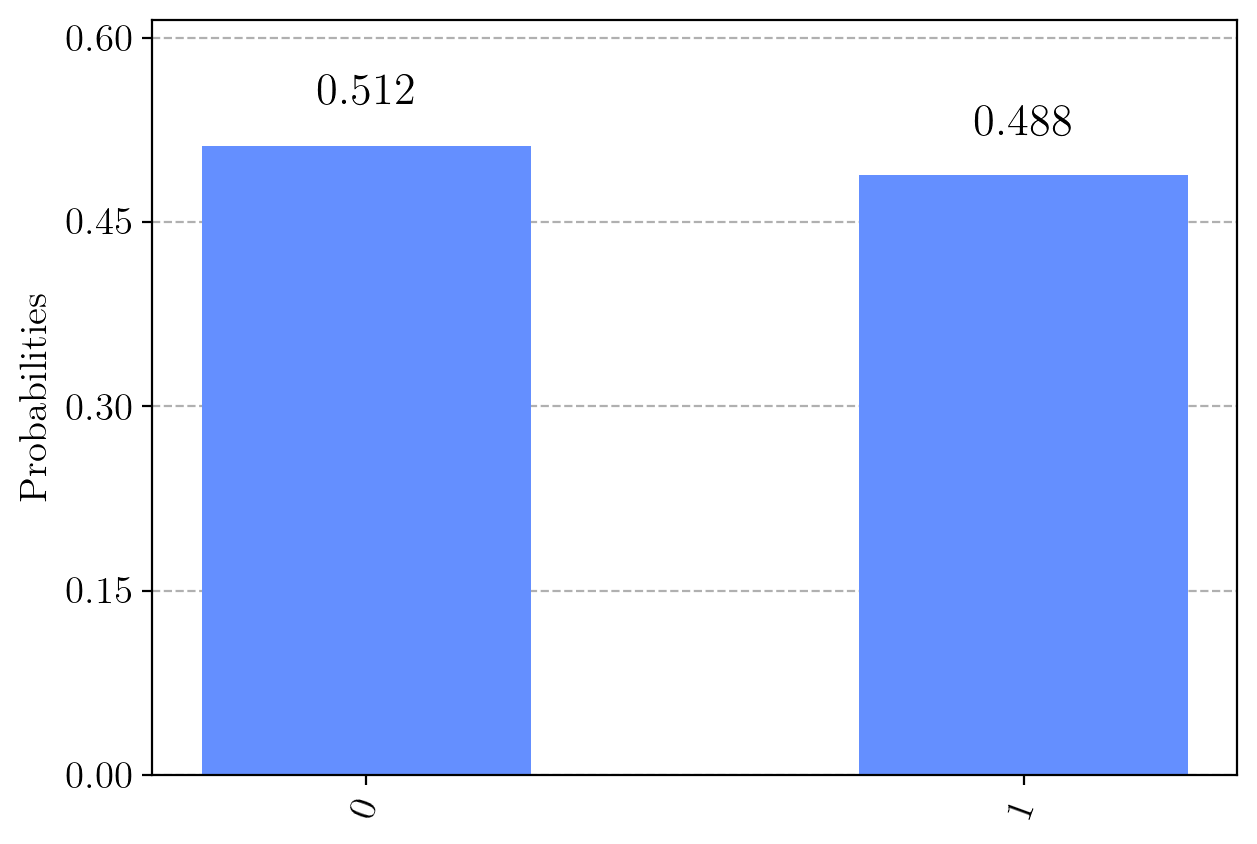

In [4]:
backend = Aer.get_backend("qasm_simulator")
results = execute(qc,backend, shots=1000).result().get_counts()
plot_histogram(results)

We can see that the probabilities are quite close to the exact answer $0.5$. Now, we are ready to run the simulations on a real quantum computer! The qiskit framework allows us to do this, we only need to log on an IBMQ account as done [here](https://quantum-computing.ibm.com/docs/manage/account/), free of charge. Then copy your APIToken and use it as below. Remember to have "" around the token!

In [5]:
from qiskit import IBMQ

In [6]:
#IBMQ.enable_account("Paste your API token here")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

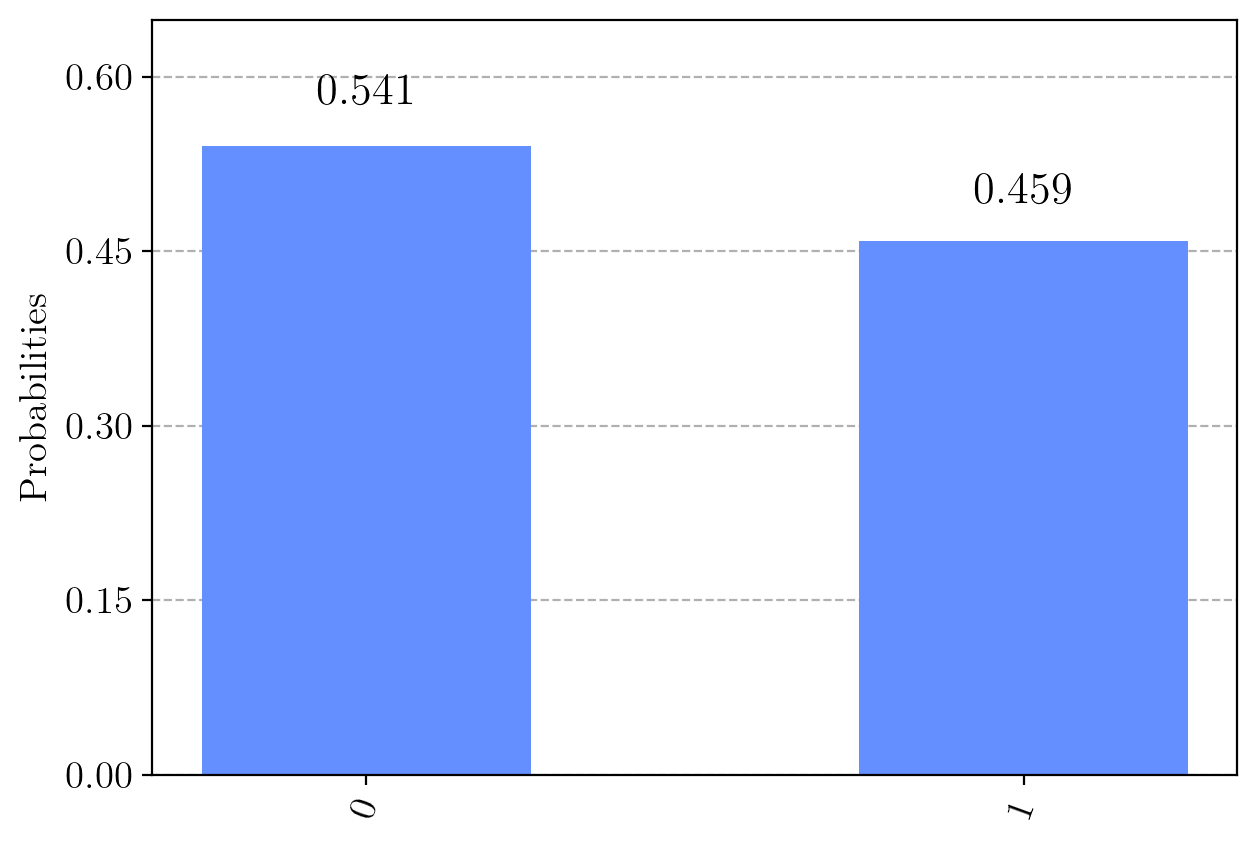

In [7]:
my_provider = IBMQ.get_provider()

my_backend  = my_provider.get_backend('ibmqx2')

job= execute(qc, backend = my_backend, shots = 8192)
plot_histogram(job.result().get_counts())

Here we see the limitations imposed by quantum decoherence. The quantum computer exhibits a inclination to have $\vert 0\rangle$ as an output state. There are a multitude of possible physical explanations (thermal fluctuations, quantum gates errors), but they are are all covered under the umbrella term quantum decoherence.

In this case, we chose the "ibmqx2" quantum computer, but for this trivial circuit it was an arbitrary choice. For more complicated circuits, you should check that the computer has enough qubits for your code. We will comment more on the hardware limitations later. 

On your IBMQ page, you will have an overview of which quantum computers that are available, as well as the queue times for each computer.

## Multi-qubit gates
Let us now see how we implement _entanglement_. 

We only need one special gate in order to implement entanglement, the CNOT gate. The controlled not gate always operates on two qubits, one control qubit, and one target qubit gate. If the control qubit is $\vert 0\rangle $ nothing happens to the target qubit, regardless of what state is in. However, if the control qubit is $\vert 1\rangle $, the target qubit changes state. In matrix form, using the basis $\vert 00\rangle , \vert 01\rangle , \vert 10\rangle , \vert 11\rangle $, we can represent the gate as


$$
\mathrm{CNOT} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
.
\label{CNOT}
$$


This gate makes it possible to entangle different qubits, i.e. make the two qubits intrinsically connected. For instance, a measurement of one qubit will yield information about the state of the other, and thus collapse both the wavefunction of the first qubit **and** the second qubit. 


The set of the two gates $U3$ and $CNOT$ are said to be a universal quantum gate set. This means that for any number of qubits, and for any unitary transformation $U$, we can use a finite number of quantum gates, to approximate $U$ to a desired precision. 


Now we will show we can write the matrix of two different gates applied on two different qubits denoted $q_0$ and $q_1$. Consider the case where both qubits are initialized to $\vert 0\rangle $, then we apply $X$ to the second qubit $\vert 0\rangle _1$ changing it to $\vert 1\rangle _1$ (subscripts refer to which qubit we are working with, i.e. the first qubit has index 0, the second qubit has index 1). We also apply $H$ to the first qubit as we did previously, $\vert 0\rangle _0 \rightarrow  \frac{1}{\sqrt{2}}\vert 0\rangle _0 + \frac{1}{\sqrt{2}} \vert 1\rangle _0 $. However, we would like to represent this as a single matrix. To do this, we use the tensor product of the two gates and the tensor product (also known as outer product from linear algebra) of the two qubits. Some of the general properties of the outer product can be found [here](https://en.wikipedia.org/wiki/Outer_product). Formally we write this as 

$$
X\vert q_1\rangle  \otimes H\vert q_0\rangle  = (X \otimes H) (\vert q_1\rangle  \otimes \vert q_0\rangle ) \equiv (X \otimes H) \vert q_1q_0\rangle .
\label{tensor}
$$
 
Let us study the tensor product $\vert q_0\rangle$ of the two qubits first. We have already used the notation (when writing $\vert 00 \rangle,\vert 01 \rangle$ etc.), but we will now define it mathematically. Consider general qubits denoted $\vert d\rangle $ and $\vert c\rangle $, which we, as previously,can write as column vectors

$$
\vert d\rangle  = 
\begin{bmatrix}
d_0  \\
d_1
\end{bmatrix}
, \; \vert c\rangle  = 
\begin{bmatrix}
c_0  \\
c_1
\end{bmatrix},
\label{vec_tensor}
$$
where $\vert d_0\vert ^2$, $\vert c_0\vert ^2$ denote the probability the qubits are in state $\vert 0\rangle $, and $\vert d_1\vert ^2$, $\vert c_1\vert ^2$ denote the probability the qubits are in state $\vert 1\rangle $. Calculating the tensor product of the vectors is done in the following way

$$
\vert dc\rangle = \vert d\rangle \otimes \vert c\rangle = \left[ 
\begin{array}{c@{}} d_0
 \left[\begin{array}{cc}
         c_{1} \\
         c_{2} \\
  \end{array}\right]   \\
  d_1
\left[  \begin{array}{c}
                       c_{1} \\ 
                       c_{2} \\
                      \end{array}\right] \\
\end{array}\right] = 
\begin{bmatrix}
d_0c_0 \\
d_0c_1 \\
d_1c_0 \\
d_1c_1 
\end{bmatrix}.
$$

For the matrix tensor product, the decomposition into one large matrix looks like this

$$
X \otimes  H = \frac{1}{\sqrt{2}}
\left[ 
\begin{array}{c@{}c@{}}
 0 \times \left[\begin{array}{cc}
         1 & 1 \\
         1 & -1 \\
  \end{array}\right] &  1 \times \left[\begin{array}{cc}
         1 & 1 \\
         1 & -1 \\
  \end{array}\right] \\
 1 \times \left[\begin{array}{cc}
         1 & 1 \\
         1 & -1 \\
  \end{array}\right] &  0 \times \left[\begin{array}{cc}
         1 & 1 \\
         1 & -1 \\
  \end{array}\right]
\end{array}\right]
=  \frac{1}{\sqrt{2}} \left\lceil
\begin{matrix}
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 \\
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0 \\
\end{matrix}
\right\rceil.
$$


This $4\times 4$ matrix we can apply directly to our 4D statevector $\vert q_1q_0\rangle $! Using equation \eqref{vec_tensor} to calculate 
$$
\vert q_1 q_0\rangle  = 
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
\end{bmatrix},
$$
we can calculate the effect of the two gates by standard matrix multiplication


$$
X\vert q_1\rangle  \otimes H\vert q_0\rangle  = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
0 \\
0 \\
1 \\
1 \\
\end{bmatrix}
.
$$

Let's study this result. Going back to ket-notation we can write this as $X\vert q_1\rangle  \otimes H\vert q_0\rangle  = \frac{1}{\sqrt{2}} \vert 10\rangle  + \frac{1}{\sqrt{2}} \vert 11\rangle $, just as we expected!


The second qubit (index 1) is always $\vert 1\rangle $, and there is a 50/50 chance of the first qubit to be in state $\vert 0\rangle $ or $\vert 1\rangle $. Calculating the tensor product of matrices can be quite tedious, so such explicit calculations are rarely done.

The tensor product formalism is the same for $N$ qubits. If we only apply a single gate e.g. $Z$, on the first qubit, and we have $N=5$ qubits, the total matrix will look like $I \otimes I \otimes I \otimes I \otimes Z$, where $I$ is the identity matrix. 



Before we finish this notebook with the last example, this is a suitable place to reflect on the true power of quantum computers. When we simulate the quantum circuits on classical computers, the number of entries in the matrix equivalent to the circuit, scales as $2^{2N}$. However, for a quantum computer, there exist a natural/physical way to implement each gate. So there is never any need to store large matrices/state vectors.
In order to reliably determine the output of a given quantum circuit, the only requirement is to run the quantum circuit a sufficiently large number of times. This is done in order to obtain a probability distribution of the output states, thus determining the probability coefficients for each state.

The last point we want to emphasize is however, that the current hardware still have fundamental flaws. We will now study one of the most basic entangled states with 2 qubits, namely the state

$$
\vert\psi \rangle = \frac{1}{\sqrt{2}} \vert 00\rangle  + \frac{1}{\sqrt{2}} \vert 11 \rangle.
$$

This state can be created by applying a Hadamard gate on the first qubit, then applying a CNOT gate with the first qubit as a target qubit, and the second qubit as the control qubit. 

Let's start by making the circuit and simulating it on a classical computer. 

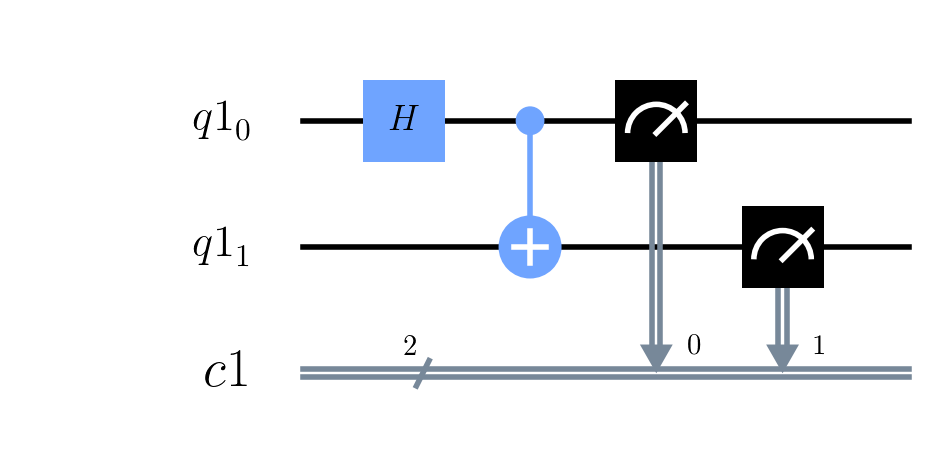

In [8]:
cr = ClassicalRegister(2)
qr = QuantumRegister(2)
qc_ent = QuantumCircuit(qr,cr)
qc_ent.h(0)  # Hadamard gate.
qc_ent.cx(0,1)  # First qubit as control qubit, and the second qubit as target qubit
qc_ent.measure(qr, cr)
qc_ent.draw(output='mpl')


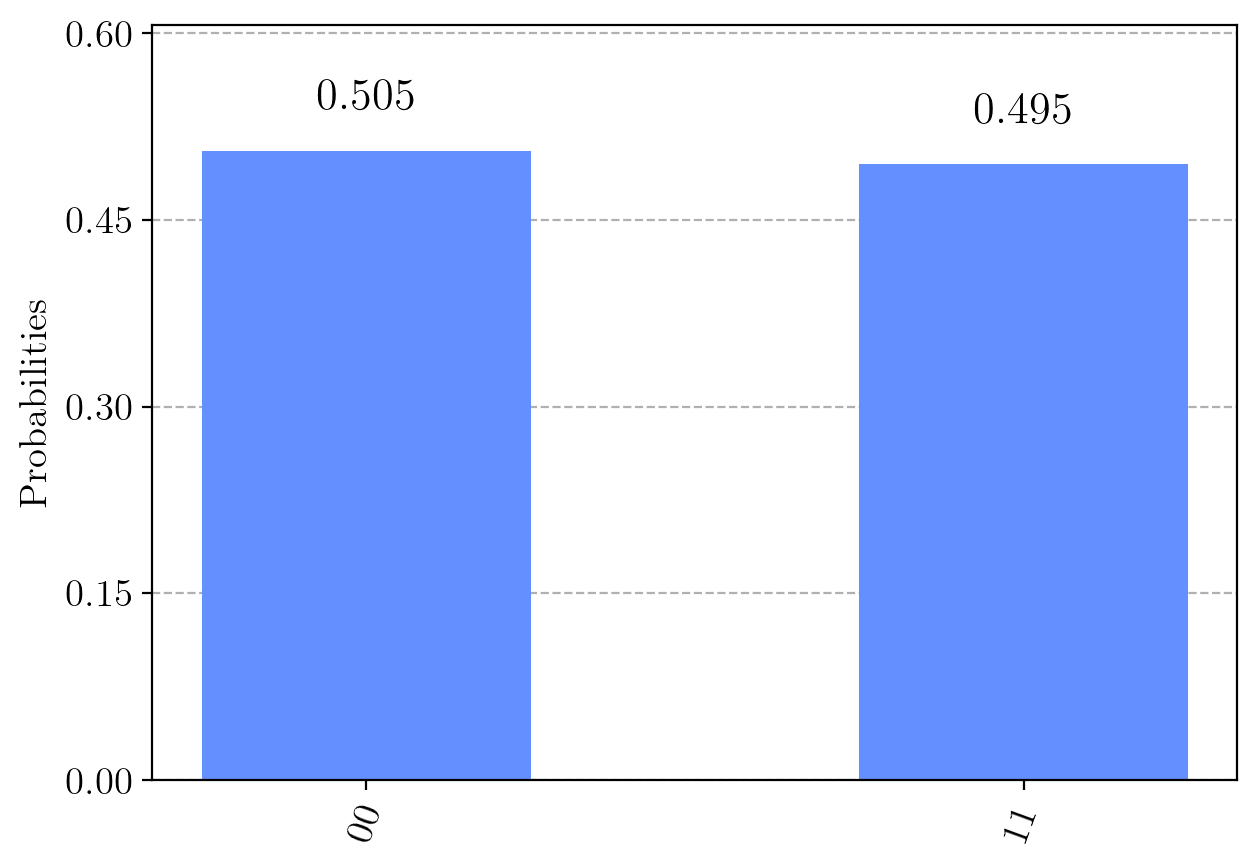

In [9]:
backend = Aer.get_backend("qasm_simulator")
results = execute(qc_ent,backend, shots=8192).result().get_counts()
plot_histogram(results)

As expected, up to some statistical noise, we get the states $\vert 00\rangle$ and $\vert 11\rangle$ with equal probability. Let's now run the circuit on a real quantum computer. 

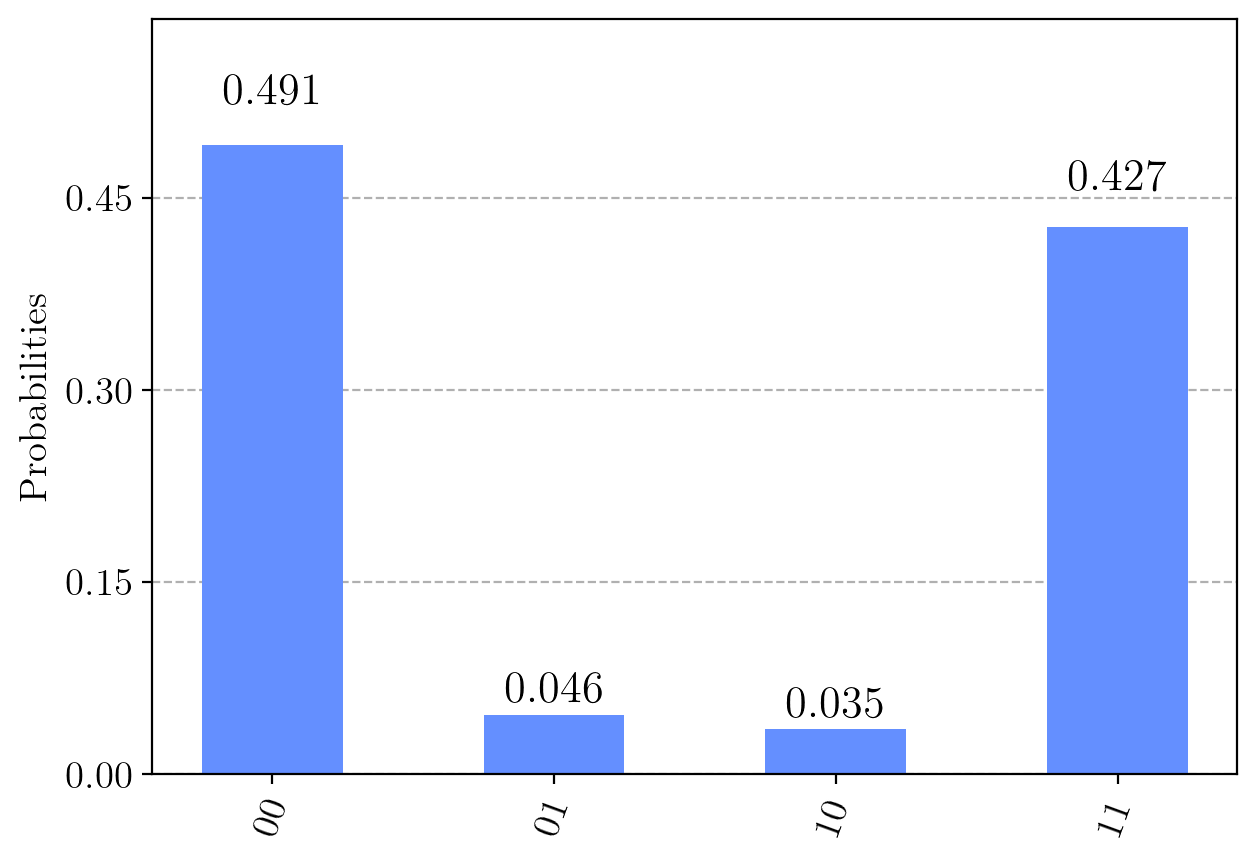

In [10]:
my_provider = IBMQ.get_provider()

my_backend  = my_provider.get_backend('ibmqx2')

job= execute(qc_ent, backend = my_backend, shots = 8192)
plot_histogram(job.result().get_counts())

We see that a total of 9% of the measured output states, are states that theoretically should never occur! In your IBMQ account, it is possible to access the error rates for each qubit, and the error rates of using CNOTS on a pair of qubits. In our case, the first and second qubit on the ibmqx2 machine have quite high error rates in comparison with the other three available qubits. It is these error rates that corrupt our results. By changing our circuit to use qubits with lower error rate, we expect the performance to increase.

Let's try again on a quantum computer with 4 times the quantum volume as the one we have used until now. The error rates for this machine is lower, so we expect better results.

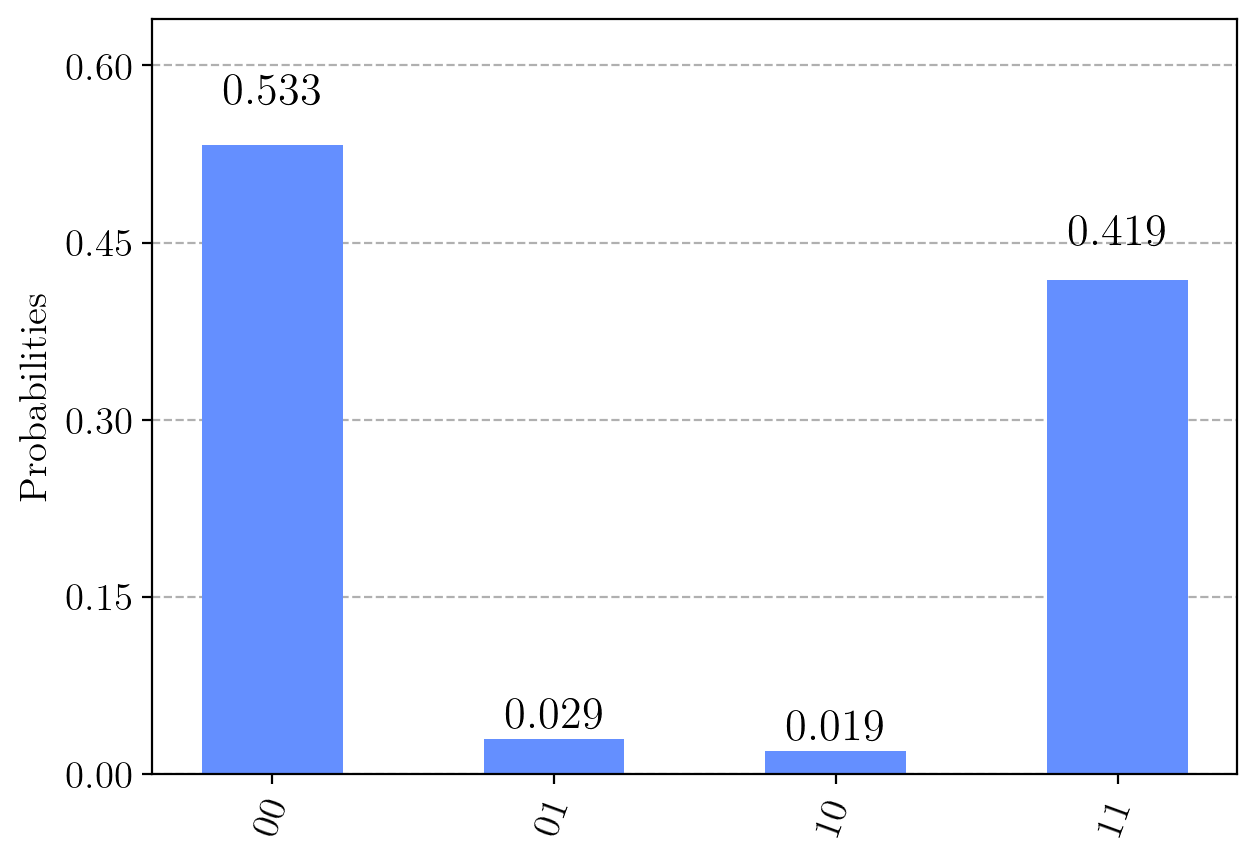

In [12]:
my_provider = IBMQ.get_provider()

my_backend  = my_provider.get_backend('ibmq_santiago')

job= execute(qc_ent, backend = my_backend, shots = 8192)
plot_histogram(job.result().get_counts())

We see that the number of measurements of the theoretically prohibited states ($\vert 01 \rangle$ and $\vert 10 \rangle$) is reduced, but still present. Also we can notice the discrepancy between the occurrences of the states $\vert 00 \rangle$ and $\vert 11 \rangle$, which of course should happen equally often. 


This last example might subdue some of your optimism for quantum computers, but luckily enormous efforts are being made in both hardware advancements which lower the error rates, but also in statistical work that mitigates the impact of hardware errors. In a future notebook we will explore one of the most promising quantum algorithms, the variational quantum eigensolver (VQE). VQE is somewhat robust to errors, and that might yield superior results than current classical algorithms within a decade or two.

___
<a id="rsc"></a>
# References
<a>[1]</a>: Hemmer, P. C. *Kvantemekanikk*. Tapir Akademisk Forlag, 2005.<br />
<a>[2]</a>: Haroche, S. Raimond, J. M., *Exploring the quantum: atoms, cavities, and photons*, Oxford University Press, 2006. <br />
<a>[3]</a>: Chuang, I. Nielsen, M. A., *Quantum Computation and Quantum Information*, Cambridge University Press, 2001. <br />